<a href="https://colab.research.google.com/github/Sarthak-Sidhant/cow/blob/main/Inception_V3%20-%20cattle%20diseases.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [ ]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'D:/Cattle_Diseases/train'
valid_path = 'D:/Cattle_Diseases/test'

In [ ]:
inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [ ]:
# don't train existing weights
for layer in inception.layers:
    layer.trainable = False

In [ ]:

# useful for getting number of output classes
folders = glob('D:/Cattle_Diseases/train/*')

In [ ]:
# our layers - you can add more if you want
x = Flatten()(inception.output)

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [ ]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   rotation_range=40,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                   brightness_range=[0.2,1.0],
                                   fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('D:/Cattle_Diseases/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 5744 images belonging to 3 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('D:\Cattle_Diseases/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 1440 images belonging to 3 classes.


In [ ]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=100,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/100
180/180 [==============================] - 594s 3s/step - loss: 0.7649 - accuracy: 0.9190 - val_loss: 0.3097 - val_accuracy: 0.9465
Epoch 2/100
180/180 [==============================] - 507s 3s/step - loss: 0.1893 - accuracy: 0.9732 - val_loss: 0.2379 - val_accuracy: 0.9653
Epoch 3/100
180/180 [==============================] - 478s 3s/step - loss: 0.1721 - accuracy: 0.9774 - val_loss: 0.3126 - val_accuracy: 0.9576
Epoch 4/100
180/180 [==============================] - 435s 2s/step - loss: 0.2213 - accuracy: 0.9768 - val_loss: 0.0511 - val_accuracy: 0.9937
Epoch 5/100
180/180 [==============================] - 414s 2s/step - loss: 0.1391 - accuracy: 0.9831 - val_loss: 0.8986 - val_accuracy: 0.9431
Epoch 6/100
180/180 [==============================] - 405s 2s/step - loss: 0.1454 - accuracy: 0.9861 - val_loss: 0.0367 - val_accuracy: 0.9937
Epoch 7/100
180/180 [==============================] - 409s 

Epoch 56/100
180/180 [==============================] - 1103s 6s/step - loss: 0.1549 - accuracy: 0.9965 - val_loss: 0.3813 - val_accuracy: 0.9882
Epoch 57/100
180/180 [==============================] - 365s 2s/step - loss: 0.1148 - accuracy: 0.9965 - val_loss: 1.0755 - val_accuracy: 0.9812
Epoch 58/100
180/180 [==============================] - 365s 2s/step - loss: 0.1026 - accuracy: 0.9970 - val_loss: 0.3504 - val_accuracy: 0.9896
Epoch 59/100
180/180 [==============================] - 366s 2s/step - loss: 0.1769 - accuracy: 0.9948 - val_loss: 1.8228e-06 - val_accuracy: 1.0000
Epoch 60/100
180/180 [==============================] - 367s 2s/step - loss: 0.0875 - accuracy: 0.9965 - val_loss: 0.5332 - val_accuracy: 0.9819
Epoch 61/100
180/180 [==============================] - 376s 2s/step - loss: 0.1513 - accuracy: 0.9972 - val_loss: 0.3001 - val_accuracy: 0.9889
Epoch 62/100
180/180 [==============================] - 374s 2s/step - loss: 0.1292 - accuracy: 0.9972 - val_loss: 0.2290 - v

In [ ]:
import matplotlib.pyplot as plt

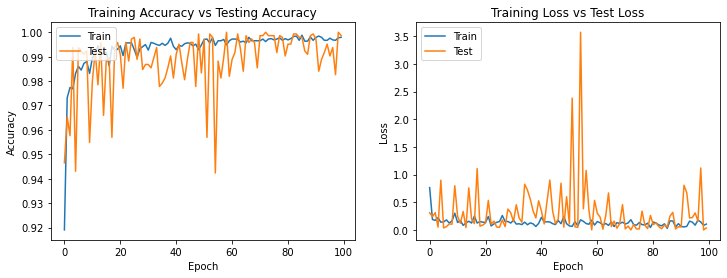

In [ ]:
fig , ax = plt.subplots(1,2)
train_acc = r.history['accuracy']
train_loss = r.history['loss']
fig.set_size_inches(12,4)

ax[0].plot(r.history['accuracy'])
ax[0].plot(r.history['val_accuracy'])
ax[0].set_title('Training Accuracy vs Testing Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Test'], loc='upper left')

ax[1].plot(r.history['loss'])
ax[1].plot(r.history['val_loss'])
ax[1].set_title('Training Loss vs Test Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Test'], loc='upper left')

plt.show()

In [ ]:
model_history = r.history
loss_accuracy_train = model.evaluate(training_set)
print("Training Loss: {:.4f}".format(loss_accuracy_train[0]))
print("Training Accuracy: {:.2%}".format(loss_accuracy_train[1]))
loss_accuracy = model.evaluate(test_set)
print("Test Loss: {:.4f}".format(loss_accuracy[0]))
print("Testing Accuracy: {:.2%}".format(loss_accuracy[1]))

180/180 [==============================] - 350s 2s/step - loss: 0.2898 - accuracy: 0.9937
Training Loss: 0.2898
Training Accuracy: 99.37%
45/45 [==============================] - 64s 1s/step - loss: 0.0350 - accuracy: 0.9986
Test Loss: 0.0350
Testing Accuracy: 99.86%


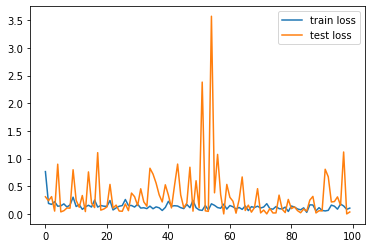

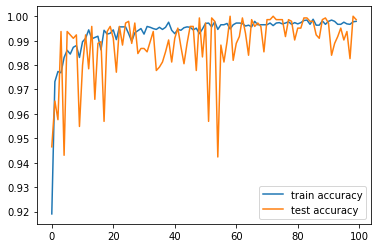

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='test loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train accuracy')
plt.plot(r.history['val_accuracy'], label='test accuracy')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')